<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/FAO_OPTIMUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Descargar y descomprimir el dataset
!mkdir -p ./trabajo
!wget -O ./trabajo/fao.zip "https://bulks-faostat.fao.org/production/Emisiones_Totales_S_Todos_los_Datos_(Normalizado).zip"
!unzip ./trabajo/fao.zip -d ./trabajo/

--2024-11-28 13:09:00--  https://bulks-faostat.fao.org/production/Emisiones_Totales_S_Todos_los_Datos_(Normalizado).zip
Resolving bulks-faostat.fao.org (bulks-faostat.fao.org)... 3.161.193.63, 3.161.193.122, 3.161.193.59, ...
Connecting to bulks-faostat.fao.org (bulks-faostat.fao.org)|3.161.193.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20526629 (20M) [application/zip]
Saving to: ‘./trabajo/fao.zip’

./trabajo/fao.zip   100%[===================>]  19.58M  48.7MB/s    in 0.4s    

2024-11-28 13:09:01 (48.7 MB/s) - ‘./trabajo/fao.zip’ saved [20526629/20526629]

Archive:  ./trabajo/fao.zip
 extracting: ./trabajo/Emisiones_Totales_S_Códigodelproductos.csv  
  inflating: ./trabajo/Emisiones_Totales_S_Códigodeláreas.csv  
  inflating: ./trabajo/Emisiones_Totales_S_Elementos.csv  
 extracting: ./trabajo/Emisiones_Totales_S_Fuentes.csv  
 extracting: ./trabajo/Emisiones_Totales_S_Símbolos.csv  
  inflating: ./trabajo/Emisiones_Totales_S_Todos_los_Datos_(Normal

In [2]:
# 1. Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# 2. Cargar el dataset
data_path = './trabajo/Emisiones_Totales_S_Todos_los_Datos_(Normalizado).csv'
data = pd.read_csv(data_path)

In [4]:
# 2.1 Breve Descripción del Dataset
print("Información general del dataset:")
print(data.info())
print("\nPrimeras filas del dataset:")
print(data.head())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397460 entries, 0 to 2397459
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Código del área        int64  
 1   Código del área (M49)  object 
 2   Área                   object 
 3   Código del producto    int64  
 4   Producto               object 
 5   Código del elemento    int64  
 6   Elemento               object 
 7   Código del año         int64  
 8   Año                    int64  
 9   Código fuente          int64  
 10  Fuente                 object 
 11  Unidad                 object 
 12  Valor                  float64
 13  Símbolo                object 
 14  Nota                   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 274.4+ MB
None

Primeras filas del dataset:
   Código del área Código del área (M49)        Área  Código del producto  \
0                2                  '004  Afganistán               

In [5]:
# Descripción textual del dataset
descripcion = """
El dataset "Totales de las emisiones" de la FAO incluye datos sobre las emisiones de gases
de efecto invernadero relacionados con la agricultura y la producción alimentaria. Este conjunto de datos
es crucial para comprender el impacto de las actividades agrícolas en el medio ambiente y su relación con
la seguridad alimentaria. Incluye emisiones de metano, óxido nitroso, dióxido de carbono y gases fluorados.
"""
print(descripcion)


El dataset "Totales de las emisiones" de la FAO incluye datos sobre las emisiones de gases
de efecto invernadero relacionados con la agricultura y la producción alimentaria. Este conjunto de datos
es crucial para comprender el impacto de las actividades agrícolas en el medio ambiente y su relación con
la seguridad alimentaria. Incluye emisiones de metano, óxido nitroso, dióxido de carbono y gases fluorados.



In [6]:
# 3. Limpieza y preparación de datos
columnas_relevantes = ['Área', 'Año', 'Producto', 'Elemento', 'Valor']
data_clean = data[columnas_relevantes].dropna()

In [7]:
# Resumen del DataFrame
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397460 entries, 0 to 2397459
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Área      object 
 1   Año       int64  
 2   Producto  object 
 3   Elemento  object 
 4   Valor     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 91.5+ MB
None


In [8]:
# Estadísticas descriptivas
print(data_clean.describe())

                Año         Valor
count  2.397460e+06  2.397460e+06
mean   2.000950e+03  3.580586e+04
std    1.546891e+01  5.322502e+05
min    1.961000e+03 -1.249870e+07
25%    1.993000e+03  1.567000e-01
50%    2.003000e+03  1.516830e+01
75%    2.013000e+03  8.138455e+02
max    2.050000e+03  5.351073e+07


In [9]:
# Dimensiones del DataFrame
print(f"El DataFrame tiene {data_clean.shape[0]} filas y {data_clean.shape[1]} columnas.")


El DataFrame tiene 2397460 filas y 5 columnas.


In [10]:
# Filtrar bloques económicos
mercosur_countries = ["Argentina", "Brazil", "Uruguay", "Paraguay"]
tlcan_countries = ["Canada", "United States of America", "Mexico"]

In [11]:
# Información de MERCOSUR:
print("Información de MERCOSUR:")
print(mercosur_countries) # Print the list directly

# Información de TLCAN:
print("\nInformación de TLCAN:")
print(tlcan_countries) # Print the list directly

Información de MERCOSUR:
['Argentina', 'Brazil', 'Uruguay', 'Paraguay']

Información de TLCAN:
['Canada', 'United States of America', 'Mexico']


In [12]:
mercosur_data = data_clean[data_clean["Área"].isin(mercosur_countries)]
tlcan_data = data_clean[data_clean["Área"].isin(tlcan_countries)]

# 4. Análisis Exploratorio de Datos (EDA)

In [13]:
## 4.1 Evaluar la distribución de emisiones por bloque económico
emisiones_mercosur = mercosur_data.groupby("Año")["Valor"].sum().reset_index()
emisiones_tlcan = tlcan_data.groupby("Año")["Valor"].sum().reset_index()

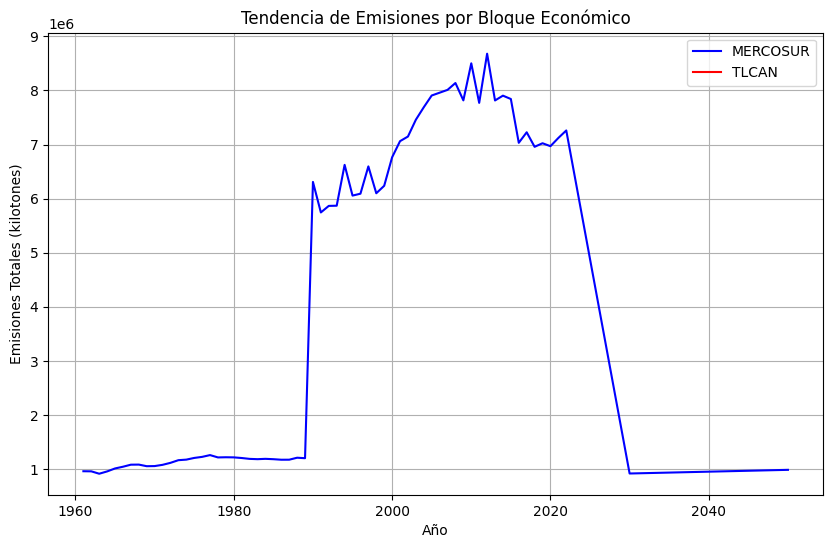

In [14]:
## 4.1 Evaluar la distribución de emisiones por bloque económico
emisiones_mercosur = mercosur_data.groupby("Año")["Valor"].sum().reset_index()
emisiones_tlcan = tlcan_data.groupby("Año")["Valor"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=emisiones_mercosur, x="Año", y="Valor", label="MERCOSUR", color="blue")
sns.lineplot(data=emisiones_tlcan, x="Año", y="Valor", label="TLCAN", color="red")
plt.title("Tendencia de Emisiones por Bloque Económico")
plt.ylabel("Emisiones Totales (kilotones)")
plt.xlabel("Año")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print(emisiones_tlcan)
print(emisiones_tlcan.info())

Empty DataFrame
Columns: [Año, Valor]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Año     0 non-null      int64  
 1   Valor   0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 124.0 bytes
None


In [16]:
print(data_clean[data_clean["Área"].isin(tlcan_countries)])


Empty DataFrame
Columns: [Área, Año, Producto, Elemento, Valor]
Index: []


In [17]:
# Ver los valores únicos en la columna 'Área'
print(data_clean["Área"].unique())

['Afganistán' 'Albania' 'Alemania' 'Andorra' 'Angola' 'Anguila'
 'Antigua y Barbuda' 'Antillas Neerlandesas (ex)' 'Arabia Saudita'
 'Argelia' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaiyán' 'Bahamas' 'Bahrein' 'Bangladesh' 'Barbados' 'Belarús'
 'Bélgica' 'Bélgica-Luxemburgo' 'Belice' 'Benin' 'Bermudas' 'Bhután'
 'Bolivia (Estado Plurinacional de)' 'Bosnia y Herzegovina' 'Botswana'
 'Brasil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Camboya' 'Camerún' 'Canadá' 'Chad' 'Checoslovaq' 'Chequia'
 'Chile' 'China' 'China, Continental' 'China, RAE de Hong Kong'
 'China, RAE de Macao' 'China, Taiwán provincia de' 'Chipre' 'Colombia'
 'Comoras' 'Congo' 'Costa Rica' "Côte d'Ivoire" 'Croacia' 'Cuba'
 'Dinamarca' 'Djibouti' 'Dominica' 'Ecuador' 'Egipto' 'El Salvador'
 'Emiratos Árabes Unidos' 'Eritrea' 'Eslovaquia' 'Eslovenia' 'España'
 'Estados Unidos de América' 'Estonia' 'Eswatini' 'Etiopía' 'Etiopía RDP'
 'Federación de Rusia' 'Fiji' 'Filipinas' 'Fi

In [18]:
# Ver los países que no coinciden
print(set(tlcan_countries) - set(data_clean["Área"].unique()))

{'United States of America', 'Canada', 'Mexico'}


In [19]:
# Buscar datos para TLCAN en el dataset original (antes de cualquier limpieza)
print(data[data["Área"].isin(['United States of America', 'Canada', 'Mexico'])])


Empty DataFrame
Columns: [Código del área, Código del área (M49), Área, Código del producto, Producto, Código del elemento, Elemento, Código del año, Año, Código fuente, Fuente, Unidad, Valor, Símbolo, Nota]
Index: []


In [20]:
# Verificar valores nulos en las columnas relevantes
print(data[data["Área"].isin(['United States of America', 'Canada', 'Mexico'])].isnull().sum())


Código del área          0
Código del área (M49)    0
Área                     0
Código del producto      0
Producto                 0
Código del elemento      0
Elemento                 0
Código del año           0
Año                      0
Código fuente            0
Fuente                   0
Unidad                   0
Valor                    0
Símbolo                  0
Nota                     0
dtype: int64


In [21]:
print(data[data["Área"].isin(['United States of America', 'Canada', 'Mexico'])])
print(data[data["Área"].isin(['United States of America', 'Canada', 'Mexico'])].isnull().sum())


Empty DataFrame
Columns: [Código del área, Código del área (M49), Área, Código del producto, Producto, Código del elemento, Elemento, Código del año, Año, Código fuente, Fuente, Unidad, Valor, Símbolo, Nota]
Index: []
Código del área          0
Código del área (M49)    0
Área                     0
Código del producto      0
Producto                 0
Código del elemento      0
Elemento                 0
Código del año           0
Año                      0
Código fuente            0
Fuente                   0
Unidad                   0
Valor                    0
Símbolo                  0
Nota                     0
dtype: int64


**Limitaciones del Análisis**
El presente análisis se limita al bloque económico MERCOSUR debido a la ausencia de datos para los países del bloque TLCAN (Canadá, Estados Unidos y México) en el dataset utilizado. Esta limitación podría deberse al alcance geográfico del dataset o a problemas en la recopilación de datos. Para incluir TLCAN en futuros análisis, se recomienda buscar datasets complementarios o más completos.


In [ ]:
## 4.2 Comparar emisiones por productos agrícolas
productos_mercosur = mercosur_data.groupby("Producto")["Valor"].sum().reset_index()
productos_tlcan = tlcan_data.groupby("Producto")["Valor"].sum().reset_index()

In [ ]:
fig = px.bar(productos_mercosur, x="Producto", y="Valor", title="Emisiones Totales por Producto (MERCOSUR)",
             labels={"Valor": "Emisiones Totales (kilotones)", "Producto": "Producto"})
fig.show()

fig = px.bar(productos_tlcan, x="Producto", y="Valor", title="Emisiones Totales por Producto (TLCAN)",
             labels={"Valor": "Emisiones Totales (kilotones)", "Producto": "Producto"})
fig.show()

<ipython-input-21-e96ae3112bb5>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




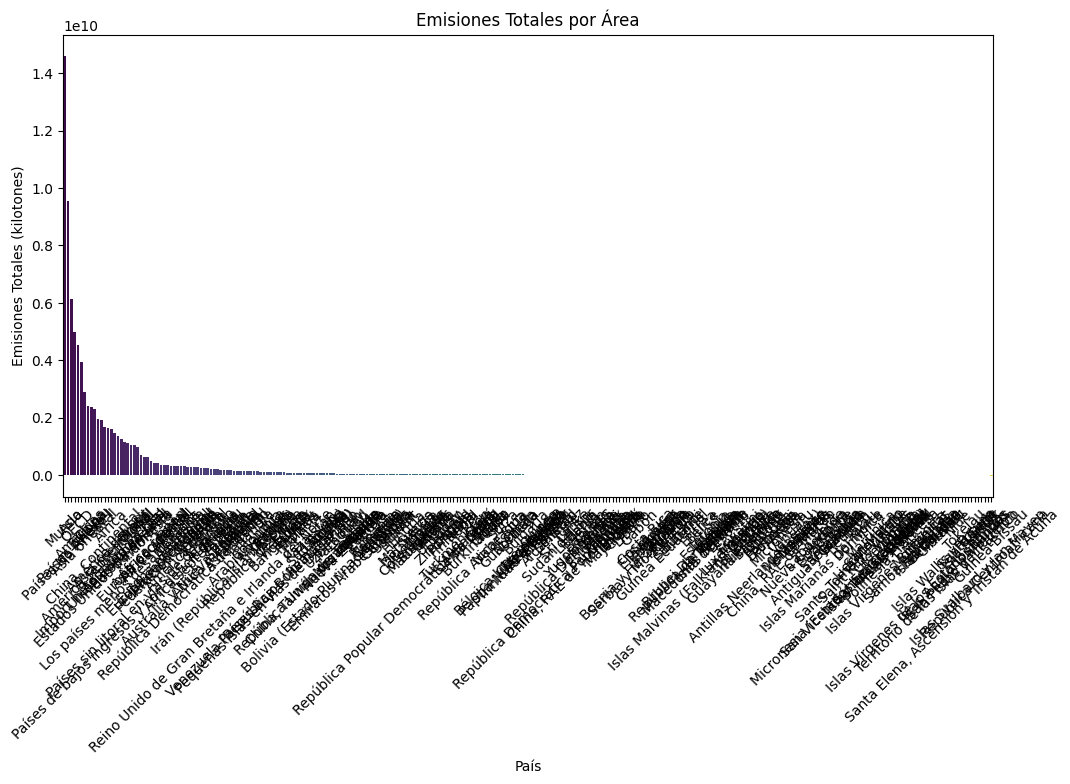

In [ ]:
## 4.3 Comparar emisiones por área
emisiones_por_area = data_clean.groupby("Área")["Valor"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=emisiones_por_area, x="Área", y="Valor", palette="viridis")
plt.title("Emisiones Totales por Área")
plt.ylabel("Emisiones Totales (kilotones)")
plt.xlabel("País")
plt.xticks(rotation=45)
plt.show()

In [22]:
# 5. Modelado Predictivo

## 5.1 Regresión Lineal en MERCOSUR
X = emisiones_mercosur[["Año"]]
y = emisiones_mercosur["Valor"]

In [23]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [26]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nEvaluación del modelo de regresión lineal:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Evaluación del modelo de regresión lineal:
Mean Squared Error (MSE): 1975736049999.6812
R² Score: 0.792581876282964


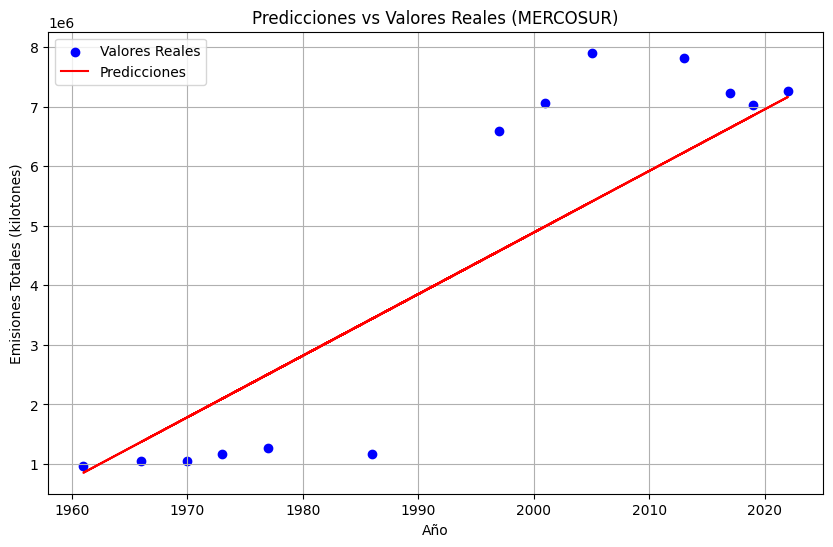

In [27]:
# Graficar Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Valores Reales")
plt.plot(X_test, y_pred, color="red", label="Predicciones")
plt.title("Predicciones vs Valores Reales (MERCOSUR)")
plt.xlabel("Año")
plt.ylabel("Emisiones Totales (kilotones)")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
## 5.2 Proyección de tendencias futuras
futuro = pd.DataFrame({"Año": range(2023, 2031)})
futuro["Predicción"] = model.predict(futuro)

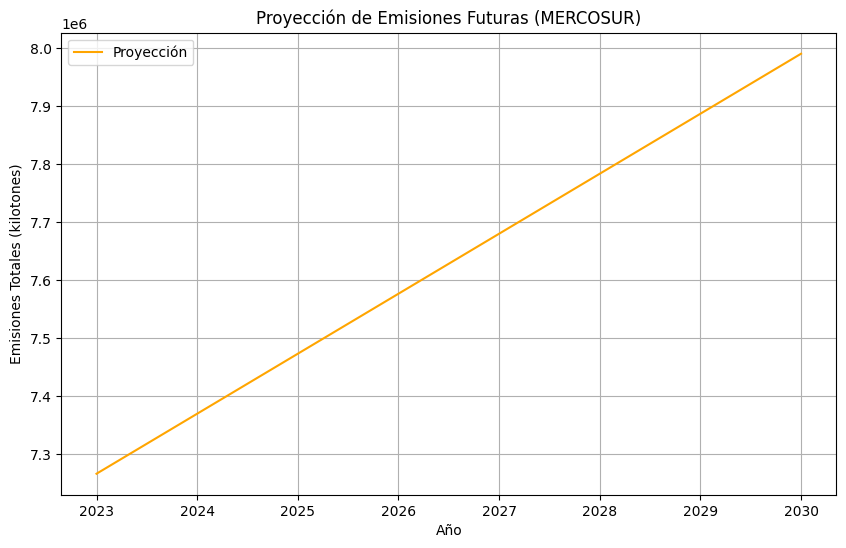

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(futuro["Año"], futuro["Predicción"], label="Proyección", color="orange")
plt.title("Proyección de Emisiones Futuras (MERCOSUR)")
plt.xlabel("Año")
plt.ylabel("Emisiones Totales (kilotones)")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Unir los datos de MERCOSUR y TLCAN
union_data = pd.concat([mercosur_data, tlcan_data])

# Guardar el resultado en un archivo CSV
union_data.to_csv("union_data.csv", index=False)
print("Los datos combinados de MERCOSUR y TLCAN se guardaron en 'union_data.csv'.")


Los datos combinados de MERCOSUR y TLCAN se guardaron en 'union_data.csv'.


In [32]:
print(union_data.head())  # Ver las primeras filas
print(union_data.info())  # Verificar la estructura y el número total de filas


            Área   Año            Producto                  Elemento   Valor
80850  Argentina  1961  Residuos agrícolas  Emisiones directas (N2O)  3.0477
80851  Argentina  1962  Residuos agrícolas  Emisiones directas (N2O)  2.7906
80852  Argentina  1963  Residuos agrícolas  Emisiones directas (N2O)  3.6661
80853  Argentina  1964  Residuos agrícolas  Emisiones directas (N2O)  4.2849
80854  Argentina  1965  Residuos agrícolas  Emisiones directas (N2O)  2.9267
<class 'pandas.core.frame.DataFrame'>
Index: 29686 entries, 80850 to 1960866
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Área      29686 non-null  object 
 1   Año       29686 non-null  int64  
 2   Producto  29686 non-null  object 
 3   Elemento  29686 non-null  object 
 4   Valor     29686 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB
None


In [33]:
# Guardar datos de MERCOSUR en un archivo CSV
mercosur_data.to_csv("mercosur_data.csv", index=False)
print("Datos de MERCOSUR guardados en 'mercosur_data.csv'.")

# Guardar datos de TLCAN en un archivo CSV
tlcan_data.to_csv("tlcan_data.csv", index=False)
print("Datos de TLCAN guardados en 'tlcan_data.csv'.")


Datos de MERCOSUR guardados en 'mercosur_data.csv'.
Datos de TLCAN guardados en 'tlcan_data.csv'.


In [34]:
print(tlcan_data.head())

Empty DataFrame
Columns: [Área, Año, Producto, Elemento, Valor]
Index: []


In [35]:
print(tlcan_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Área      0 non-null      object 
 1   Año       0 non-null      int64  
 2   Producto  0 non-null      object 
 3   Elemento  0 non-null      object 
 4   Valor     0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 0.0+ bytes
None
